# 1. Primitive Variables vs Object Reference Variables
---

In Java, **all objects** are allocated on Heap. This is different from C++ where objects can be allocated memory either on Stack or on Heap.

- Whenever you use `new`, an object is created on the heap.
- Local variables are stored on the stack. That includes primitives (such as `int`) and the references to any objects created. The actual objects themselves aren't created on the stack, as I mentioned when you use `new` they'll be created on the heap. https://stackoverflow.com/a/8061692/16317008

对上面叙述有个疑问`int age = 9;` 首先cat是个reference, 位于stack上, 然后cat指向对象Cat在heap的地址. 那`9`在哪里? age又是个什么, reference吗?

答案是, 对于基础数据类型, 比如age, 它里面的内容就是`9`, 而不是heap的某块地址. age就是个variable, 它的值就是9. 

这里不得不clearify一下两个概念(primitive variables, object reference variables)并说明二者区别:

> Just as men and women are fundamentally different (according to John Gray, author of Men Are from Mars, Women Are from Venus), **primitive variables** and **object reference variables** differ from each other in multiple ways. The basic difference is that **primitive variables store the actual values**, whereas reference variables store the addresses of the objects they refer to. Let’s assume that a class Person is already defined. If you create an int variable a, and an object reference variable person, they will store their values in memory as shown in figure 2.13. https://stackoverflow.com/a/32049775/16317008

```
int a = 77;
Person person = new Person();
```

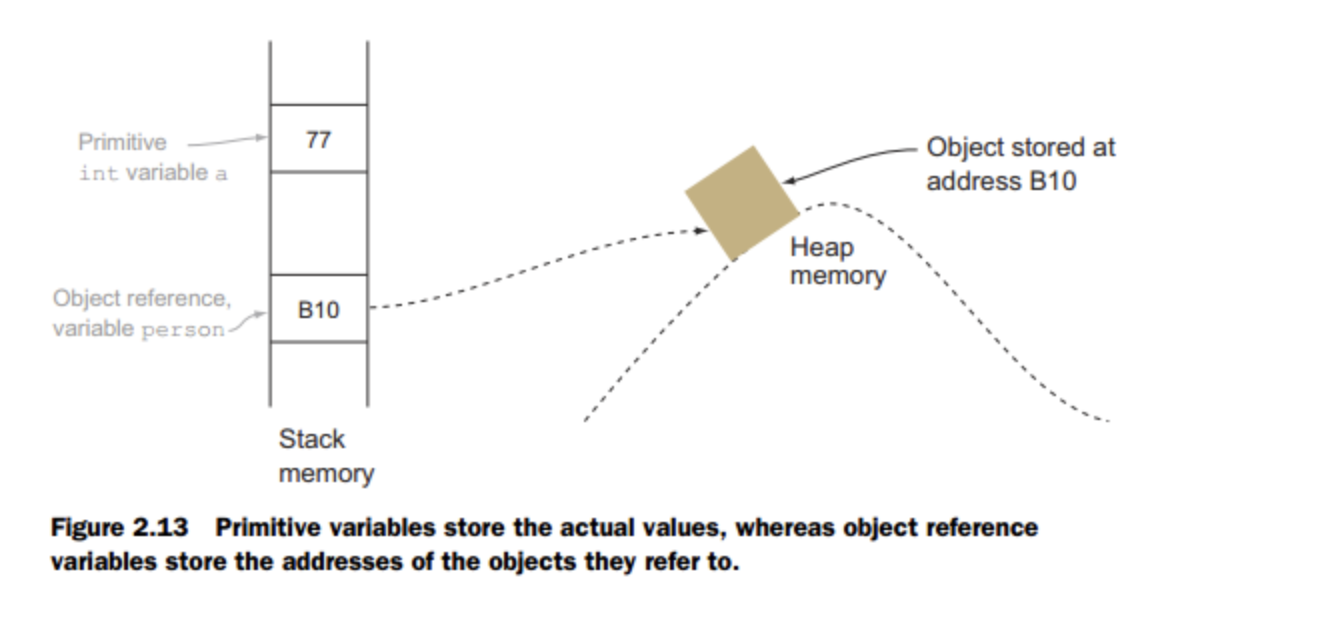

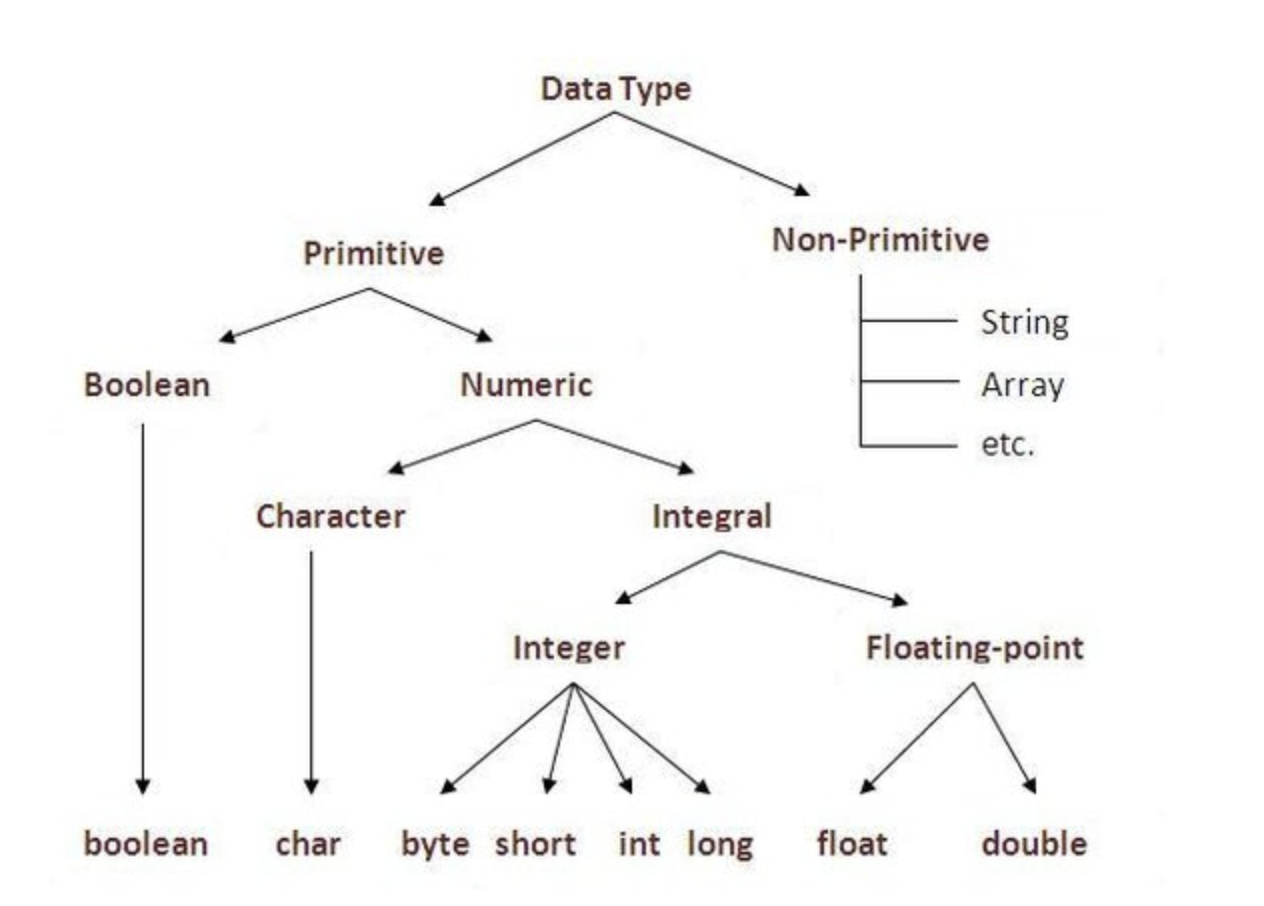

# 2. JVM 内存结构
---

说这个之前缕清JVM的内存结构: JVM memory is divided into multiple parts: Heap Memory, Non-Heap Memory, and Other.



## 2.1. Method Area vs Heap 

The method area is created on virtual machine start-up. Although the method area is logically part of the heap, simple implementations may choose not to either garbage collect or compact it.

# 3. String Pool 在哪? 到底存不存在String Pool?
---




# 5. GC and String

Before Java 7, the JVM placed the Java String Pool in the PermGen space, which has a fixed size — it can't be expanded at runtime and is not eligible for garbage collection.

The risk of interning Strings in the PermGen (instead of the Heap) is that we can get an OutOfMemory error from the JVM if we intern too many Strings.

From Java 7 onwards, the **Java String Pool is stored in the Heap space**, which is garbage collected by the JVM. The advantage of this approach is the reduced risk of OutOfMemory error because unreferenced Strings will be removed from the pool, thereby releasing memory. 


所以String对象会被GC清理, 却String存储在heap上, 可能说的有点区别, 比如string存储在string pool, 不会直接说存储在heap上. 

# 3. JVM内存结构 Runtime Data Area
---

The JVM divides its memory into two main categories: heap memory and non-heap memory. It’s where objects that are created by the application are stored. They remain there until they are no longer referenced and are garbage collected. 

细节请参考: https://docs.oracle.com/javase/specs/jvms/se8/html/jvms-2.html#jvms-2.5

#### 1) Heap(Shared among Threads, JVM启动的时候创建)
The heap is the run-time data area from which memory for all class instances and arrays is allocated.
下面这就是数组对象, 其它的对象比如hashmap, list都是类, 类的实例当然也是存储在heap上. 
```java
int arr[] = new int[5];
```

#### 2) Method Area(Shared among Threads, JVM启动的时候创建)
类似C的文本字段区, 说白了就是存储代码的, 在这存储的是字节码, JVM主要靠这个来执行程序, 知道下一步要干啥, 所有线程都可访问, 毕竟每个线程需要知道自己接下来要干嘛. 

> 注意**String Pool存储在Method Area里的Runtime constant pool**, 并且不同的JVM实现不一样(The exact location of the string pool is not specified and can vary from one JVM implementation to another).

- Classloader reference
- Run time constant pool — Numeric constants, field references... 
- Field data — Per field: name, type, modifiers, attributes
....

#### 3) PC Register(per Thread, 线程被创建时创建)
Each Java Virtual Machine thread has its own pc (program counter) register. 

#### 4) Stack Area(per Thread, 线程被创建时创建)
在方法调用时，创建一个叫栈帧的数据结构，用于存储局部变量和部分过程的结果，栈帧由以下几部分组成：

局部变量表：存储方法调用时传递的参数，从0开始存储this、方法参数、局部变量

操作数栈：执行中间操作，存储从局部变量表或对象实例字段复制的常量或变量值，以及操作结果，另外，还用来准备被调用方法的参数和接受方法调用的返回结果

动态链接：一个指向运行时常量池的引用，将 class 文件中的符号引用（描述一个方法调用了其他方法或访问成员变量）转为直接引用

方法返回地址：方法正常退出或抛出异常退出，返回方法被调用的位置

#### 5) Native Method Stacks(per Thread)

Native methods are Java™ methods that start in a language other than Java. Native methods can access system-specific functions and APIs that are not available directly in Java.

The use of native methods limits the portability of an application, because it involves system-specific code. Native methods can either be new native code statements or native code statements that call existing native code.

Once you decide that a native method is required, it may have to interoperate with the Java virtual machine where it runs. The Java Native Interface (JNI) facilitates this interoperability in a platform-neutral way.

The JNI is a set of interfaces that permit a native method to interoperate with the Java virtual machine in numerous ways. For example, the JNI includes interfaces that create new objects and call methods, get fields and set fields, process exceptions, and manipulate strings and arrays.

An implementation of the Java Virtual Machine may use conventional stacks, colloquially called "C stacks," to support native methods (methods written in a language other than the Java programming language). Native method stacks may also be used by the implementation of an interpreter for the Java Virtual Machine's instruction set in a language such as C. Java Virtual Machine implementations that cannot load native methods and that do not themselves rely on conventional stacks need not supply native method stacks. If supplied, native method stacks are typically allocated per thread when each thread is created.

#### 补充一下上面的Run-Time Constant Pool (属于method area)
存储类或接口中的数值字面量，字符串字面量以及所有方法或字段的引用，基本上涉及到方法或字段，JVM 就会在运行时常量池中搜索其具体的内存地址

It contains several kinds of constants, ranging from numeric literals known at compile-time to method and field references that must be resolved at run-time. The run-time constant pool serves a function similar to that of a symbol table for a conventional programming language, although it contains a wider range of data than a typical symbol table.

所以**运行时长量池, 不仅存储一些数字字符串常量**, 还存储类的field, method的地址, runtime的时候, JVM要到这个区域检索信息. 

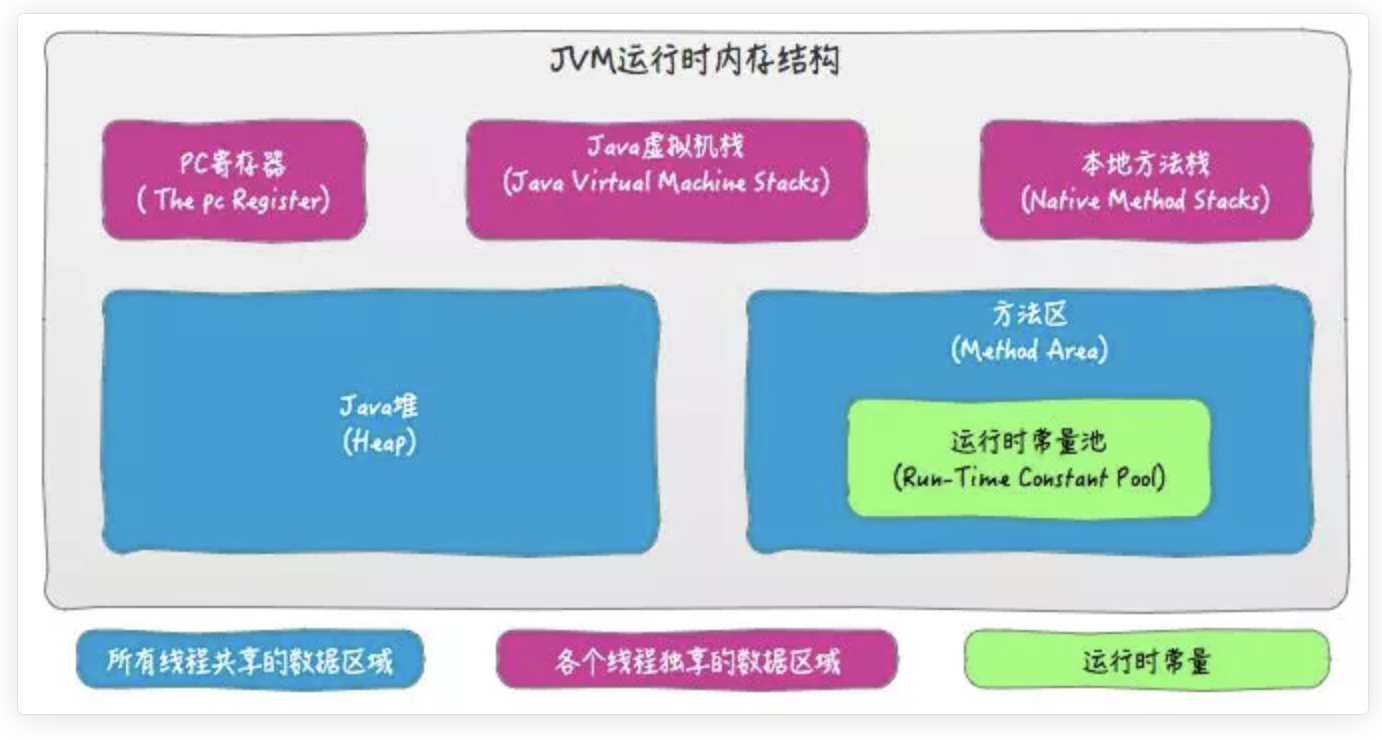